In [2]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import osmnx as ox

import os
import sys
import pickle
import seaborn as sns
import geopandas as gpd
import re

from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from pathlib import Path

In [3]:
prjDir= Path().absolute() / ".."
pythonDir=prjDir / "Python" 
print(pythonDir)
sys.path.append(os.path.join("/home/charles/Projects/QcMtlStreets", "Python"))   

/home/charles/Projects/QcMtlStreets/Notebooks/EdgeGrades/../Python


In [4]:
from OsmnxElev import *
print(ROOT_DIR)

/home/charles/Projects/QcMtlStreets/


In [5]:
listNeigh=["Saint-Jean-Baptiste", \
                                                "Saint-Roch" , \
                                                "Vieux-Québec/Cap-Blanc/Colline parlementaire",\
                                                "Montcalm",\
                                                "Saint-Sauveur"]

In [6]:
graphQc3Neigh, shpQc3Neigh, dfPointsSubsetQc3Neigh=getInducedSubgraphNeighQc( listNeigh )


File exists => reading graph
There are  0.17462765309849437  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste, Saint-Roch, Vieux-Québec/Cap-Blanc/Colline parlementaire, Montcalm, Saint-Sauveur


In [7]:
dfAllEdgesInSet,dfEdgesCutset=getEdgesInSetNeigh(graphQc3Neigh, listNeigh)

In [8]:
dfAllEdgesInSet.head(2)

startNode     endNode              startEndPair  grade_abs  \
0  2510487581  2510487598  (2510487581, 2510487598)     0.0403   
1  2510487581  2510487542  (2510487581, 2510487542)     0.0001   

   startElevation startNeigh  endElevation  endNeigh  
0          90.143   Montcalm        89.829  Montcalm  
1          90.143   Montcalm        90.141  Montcalm

In [9]:
dfEdgesCutset.head(2)

startNode           startNeigh       endNode    endNeigh   grade  \
0  1.649256e+08  Saint-Jean-Baptiste  3.960459e+09  Saint-Roch -0.0702   
1  4.723196e+09  Saint-Jean-Baptiste  2.757319e+08  Saint-Roch  0.0745   

   grade_abs  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.0702         1       2          (1, 2)            (1, 2)   
1     0.0745         1       2          (1, 2)            (1, 2)   

                  startEndPair  
0  (164925596.0, 3960458872.0)  
1  (4723196405.0, 275731864.0)

In [10]:
dfAllEdges=pd.concat([dfAllEdgesInSet,dfEdgesCutset],axis=0)
dfAllEdges['pairNeigh'] = [(u,v) for u,v in dfAllEdges[['startNeigh','endNeigh']].values]
dfAllEdges['isSameNeigh'] = dfAllEdges['startNeigh'] == dfAllEdges['endNeigh']
dfAllEdges["pairNeigh"].astype('category')
dfAllEdges.head()

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


endElevation  endIdx    endNeigh       endNode  grade  grade_abs  \
0        89.829     NaN    Montcalm  2.510488e+09    NaN     0.0403   
1        90.141     NaN    Montcalm  2.510488e+09    NaN     0.0001   
2        90.143     NaN    Montcalm  2.510488e+09    NaN     0.0403   
3        89.061     NaN    Montcalm  2.510488e+09    NaN     0.0189   
4         7.637     NaN  Saint-Roch  2.301928e+09    NaN     0.0006   

  pairIdxDirected pairIdxUndirected  startElevation              startEndPair  \
0             NaN               NaN          90.143  (2510487581, 2510487598)   
1             NaN               NaN          90.143  (2510487581, 2510487542)   
2             NaN               NaN          89.829  (2510487598, 2510487581)   
3             NaN               NaN          89.829  (2510487598, 2510487727)   
4             NaN               NaN           7.618  (4247650351, 2301927897)   

   startIdx  startNeigh     startNode                 pairNeigh  isSameNeigh  
0       NaN    Montcalm  2.510488e+09      (Montcalm, Montcalm)         True  
1       NaN    Montcalm  2.510488e+09      (Montcalm, Montcalm)         True  
2       NaN    Montcalm  2.510488e+09      (Montcalm, Montcalm)         True  
3       NaN    Montcalm  2.510488e+09      (Montcalm, Montcalm)         True  
4       NaN  Saint-Roch  4.247650e+09  (Saint-Roch, Saint-Roch)         True

In [11]:
dfGrouped=dfAllEdges.groupby(['pairNeigh']).agg({'grade_abs':'mean'}).sort_values('grade_abs')

In [12]:
dfGrouped['isSameNeigh'] = [p[0]==p[1] for p in dfGrouped.index.values]
dfGrouped['color'] = ["red" if p else "blue" for p in dfGrouped['isSameNeigh']]

In [13]:
dfGrouped.reset_index(inplace=True)
dfGrouped

pairNeigh  grade_abs  isSameNeigh  \
0   (Saint-Roch, Vieux-Québec/Cap-Blanc/Colline pa...   0.013200        False   
1   (Vieux-Québec/Cap-Blanc/Colline parlementaire,...   0.017514        False   
2                         (Saint-Sauveur, Saint-Roch)   0.023609        False   
3   (Vieux-Québec/Cap-Blanc/Colline parlementaire,...   0.029024        False   
4                         (Saint-Roch, Saint-Sauveur)   0.032025        False   
5                      (Saint-Sauveur, Saint-Sauveur)   0.034892         True   
6                            (Saint-Roch, Saint-Roch)   0.036368         True   
7   (Vieux-Québec/Cap-Blanc/Colline parlementaire,...   0.037297        False   
8   (Saint-Jean-Baptiste, Vieux-Québec/Cap-Blanc/C...   0.038969        False   
9                     (Saint-Jean-Baptiste, Montcalm)   0.041450        False   
10                    (Montcalm, Saint-Jean-Baptiste)   0.043489        False   
11                               (Montcalm, Montcalm)   0.044868         True   
12  (Montcalm, Vieux-Québec/Cap-Blanc/Colline parl...   0.052493        False   
13  (Vieux-Québec/Cap-Blanc/Colline parlementaire,...   0.054384         True   
14         (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   0.061014         True   
15                          (Saint-Sauveur, Montcalm)   0.086725        False   
16                          (Montcalm, Saint-Sauveur)   0.086725        False   
17                             (Montcalm, Saint-Roch)   0.132800        False   
18                             (Saint-Roch, Montcalm)   0.132800        False   
19                  (Saint-Jean-Baptiste, Saint-Roch)   0.150814        False   
20                  (Saint-Roch, Saint-Jean-Baptiste)   0.171711        False   

   color  
0   blue  
1   blue  
2   blue  
3   blue  
4   blue  
5    red  
6    red  
7   blue  
8   blue  
9   blue  
10  blue  
11   red  
12  blue  
13   red  
14   red  
15  blue  
16  blue  
17  blue  
18  blue  
19  blue  
20  blue

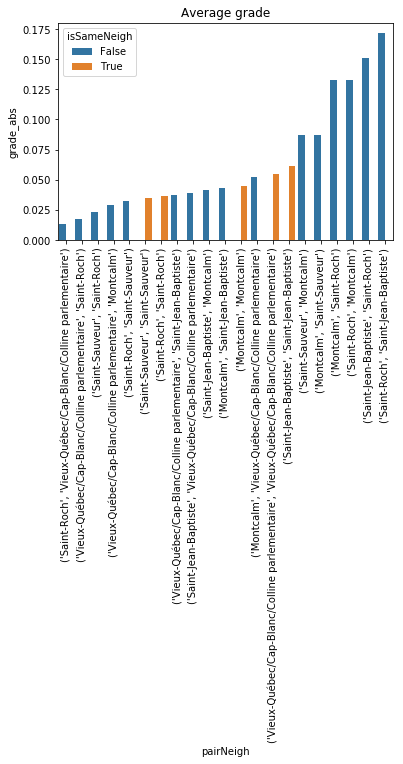

In [15]:
g=sns.barplot(x='pairNeigh' , y='grade_abs',hue="isSameNeigh",data=dfGrouped) 
g.set_xticklabels(rotation=90,labels=dfGrouped['pairNeigh'].unique())
g.set_title('Average grade')
plt.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","averageGradeBetweenWithin5Neigh.png"))

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '
/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '
/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '
/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might

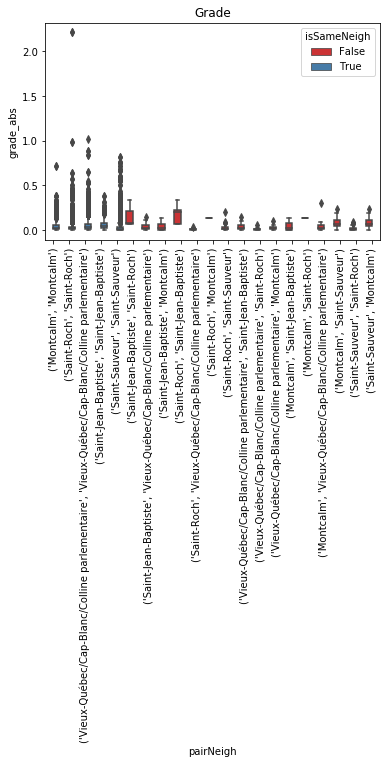

In [25]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

g=sns.boxplot(x="pairNeigh", y="grade_abs", hue="isSameNeigh", data=dfAllEdges, palette="Set1")
g.set_xticklabels(rotation=90,labels=dfAllEdges['pairNeigh'].unique())
g.set_title('Grade')
#plt.gcf().subplots_adjust(bottom=-3)
plt.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","boxplotGradeBetweenWithin5Neigh.png"))